In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
sample = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [3]:
train.head

<bound method NDFrame.head of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  Fo

In [4]:
train.isna().sum(axis=0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
print(train.isna().sum(axis=0)/train.shape[0])
print(test.isna().sum(axis=0)/test.shape[0])


PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64
PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64


In [6]:
print(train.shape)
print(test.shape)
print(sample.shape)

(8693, 14)
(4277, 13)
(4277, 2)


In [7]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train["billing_moving"] =train["RoomService"] + train["Spa"] + train["VRDeck"] 
train["billing_fixed"] = train["FoodCourt"]  + train["ShoppingMall"]  

In [10]:
test["billing_moving"] =test["RoomService"] + test["Spa"] + test["VRDeck"] 
test["billing_fixed"] = test["FoodCourt"]  + test["ShoppingMall"]  

In [11]:
train["HomeDestination"] = train["HomePlanet"] + train["Destination"]

In [12]:
categorical = train.dtypes[train.dtypes == "object"].index
print(categorical)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'HomeDestination'],
      dtype='object')


In [13]:
train[categorical].describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,HomeDestination
count,8693,8492,8476,8494,8511,8490,8493,8314
unique,8693,3,2,6560,3,2,8473,9
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,EarthTRAPPIST-1e
freq,1,4602,5439,8,5915,8291,2,3101


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8494 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  billing_moving   8149 non-null   float64
 15  billing_fixed    8304 non-null   float64
 16  HomeDestination  8314 non-null   object 
dtypes: bool(1), fl

In [15]:
train["Transported"].describe()

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

Exploratory data analysis 
outliers 

In [16]:
train["PassengerId"].describe()

count        8693
unique       8693
top       0001_01
freq            1
Name: PassengerId, dtype: object

In [17]:
train["Name"].describe()

count               8493
unique              8473
top       Gollux Reedall
freq                   2
Name: Name, dtype: object

In [18]:
train["Cabin"].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [19]:
new_cryosleep = pd.Categorical(train["CryoSleep"])
new_vip = pd.Categorical(train["VIP"])

In [20]:
# add na here for categorical (and then in object ... later )


In [21]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

Deck = np.array([cabin[0] if cabin != "nan" else "unknown" for cabin in char_cabin])
Deck = pd.Categorical(Deck)

Deck.describe()
train['Deck'] = Deck

In [22]:
char_cabin = test["Cabin"].astype(str) # Convert data to str

Deck = np.array([cabin[0] if cabin != "nan" else "unknown" for cabin in char_cabin]) # Take first letter

Deck = pd.Categorical(Deck)

Deck.describe()
test['Deck'] = Deck

In [23]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

Side = np.array([cabin[-1] if cabin != "nan" else "unknown" for cabin in char_cabin]) # Take first letter

Side = pd.Categorical(Side)

Side .describe()
train["Side"] = Side

In [24]:
char_cabin = test["Cabin"].astype(str) # Convert data to str

Side = np.array([cabin[-1] if cabin != "nan" else "unknown" for cabin in char_cabin]) # Take first letter

Side = pd.Categorical(Side)

Side .describe()
test["Side"] = Side

In [25]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

DeckSide = np.array([cabin[0] + cabin[-1] if cabin != "nan" else "unknown"  for cabin in char_cabin ]) # Take first letter

DeckSide = pd.Categorical(DeckSide)

DeckSide .describe()

,counts,freqs
categories,,
AP,117,0.013459
AS,139,0.015990
BP,353,0.040607
BS,426,0.049005
CP,341,0.039227
CS,406,0.046704
DP,248,0.028529
DS,230,0.026458
EP,429,0.049350


In [26]:
train["DeckSide"] = DeckSide

In [27]:
char_cabin = train["Cabin"].astype(str) # Convert data to str

# Filter out empty strings or strings with fewer than 3 characters
num_char_cabin = [cabin[2:-2] for cabin in char_cabin]

# Extract numerical values and convert them to integers
cabin_num = np.array([int(cabin[2:-2]) if cabin != "nan" else 0 for cabin in char_cabin])

# Create a DataFrame from the extracted numerical values
cabin_num_df = pd.DataFrame(cabin_num)
train['CabinNum'] = cabin_num_df

In [28]:
cabin_num[15]

0

In [29]:
char_cabin = test["Cabin"].astype(str) # Convert data to str

# Filter out empty strings or strings with fewer than 3 characters
valid_char_cabin = [cabin for cabin in char_cabin if cabin != '' and len(cabin) >= 5]

# Extract numerical values and convert them to integers
cabin_num = np.array([int(cabin[2:-2]) if cabin != "nan" else 0 for cabin in char_cabin])

# Create a DataFrame from the extracted numerical values
cabin_num_df = pd.DataFrame(cabin_num)
test['CabinNum'] = cabin_num_df

In [30]:
train["ShoppingMall"].value_counts(dropna =False)

ShoppingMall
0.0       5587
NaN        208
1.0        153
2.0         80
3.0         59
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1116, dtype: int64

In [31]:
train.groupby("Destination")[["Transported"]].value_counts()

Destination    Transported
55 Cancri e    True           1098
               False           702
PSO J318.5-22  True            401
               False           395
TRAPPIST-1e    False          3128
               True           2787
Name: count, dtype: int64

In [32]:
transported_class_2 = pd.crosstab(index=train["Transported"], 
                            columns=train["Deck"],
                             margins=True)

In [33]:
transported_class_2 = pd.crosstab(index=train["Transported"], 
                            columns=train["Deck"],
                             margins=True)
transported_class_2.columns =  np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n', 'rowtotal']) 
transported_class_2.index= ["Transported","NoTransported","coltotal"]
transported_class_2/transported_class_2.loc["coltotal","rowtotal"]

,A,B,C,D,E,F,G,T,n,rowtotal
Transported,0.014840,0.023812,0.027493,0.031175,0.064765,0.180030,0.142413,0.000460,0.011388,0.496376
NoTransported,0.014609,0.065800,0.058438,0.023812,0.036006,0.141378,0.151961,0.000115,0.011504,0.503624
coltotal,0.029449,0.089612,0.085931,0.054987,0.100771,0.321408,0.294375,0.000575,0.022892,1.000000


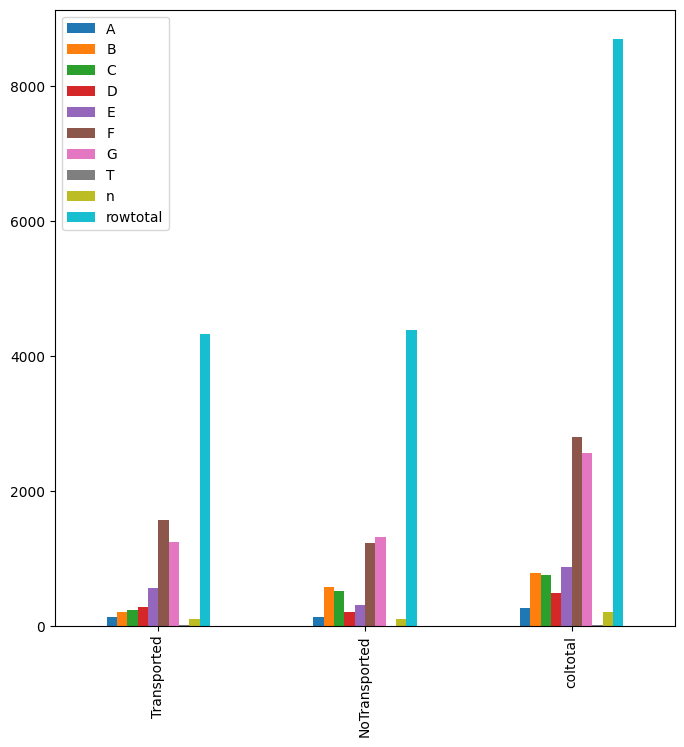

In [34]:
transported_class_2.plot(kind="bar",
                 figsize=(8,8));

In [35]:
train["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

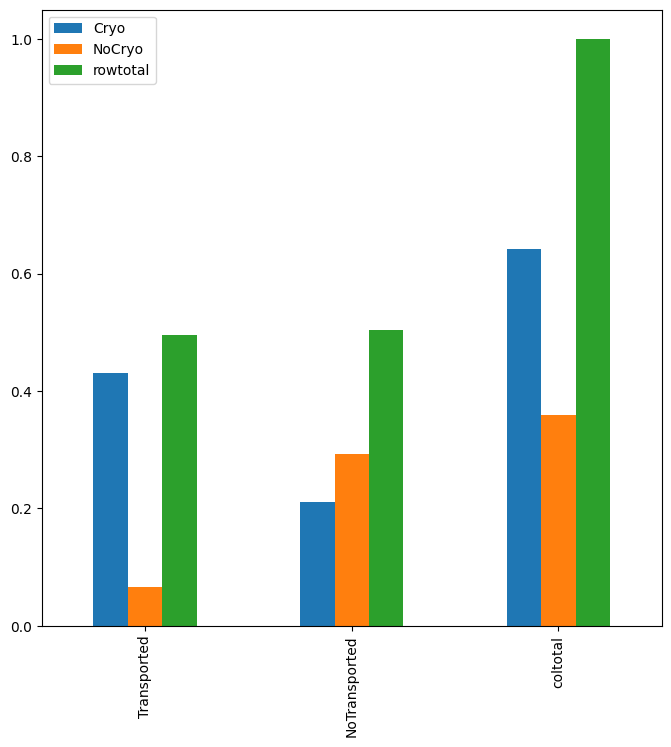

In [36]:

cryocross = pd.crosstab(index=train["Transported"], 
                            columns=train["CryoSleep"],
                             margins=True)
cryocross.columns = ['Cryo', 'NoCryo',"rowtotal"]
cryocross.index= ["Transported","NoTransported","coltotal"]
(cryocross/cryocross.loc["coltotal","rowtotal"]).plot(kind="bar",
                 figsize=(8,8));

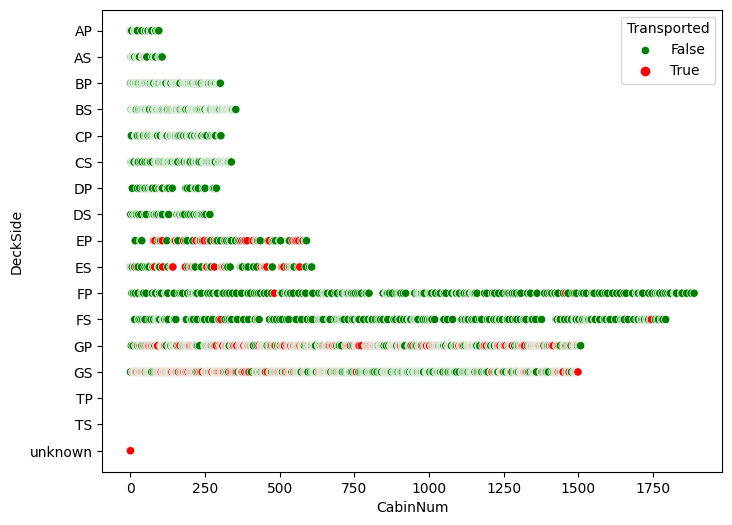

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your cryo_data DataFrame
cryo_data = train[train["CryoSleep"] == 1][["CabinNum", "DeckSide", "Transported"]]

# Create a scatter plot with different colors for "Transported" (True/False)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.scatterplot(data=cryo_data, x="CabinNum", y="DeckSide", hue="Transported", palette={True: 'green', False: 'red'})

plt.xlabel("CabinNum")
plt.ylabel("DeckSide")

plt.legend(title="Transported", labels=["False", "True"])  # Custom legend labels

plt.show()

In [38]:
train["billing_fixed"]

0          0.0
1         34.0
2       3576.0
3       1654.0
4        221.0
         ...  
8688    6819.0
8689       0.0
8690    1872.0
8691    1049.0
8692    4688.0
Name: billing_fixed, Length: 8693, dtype: float64

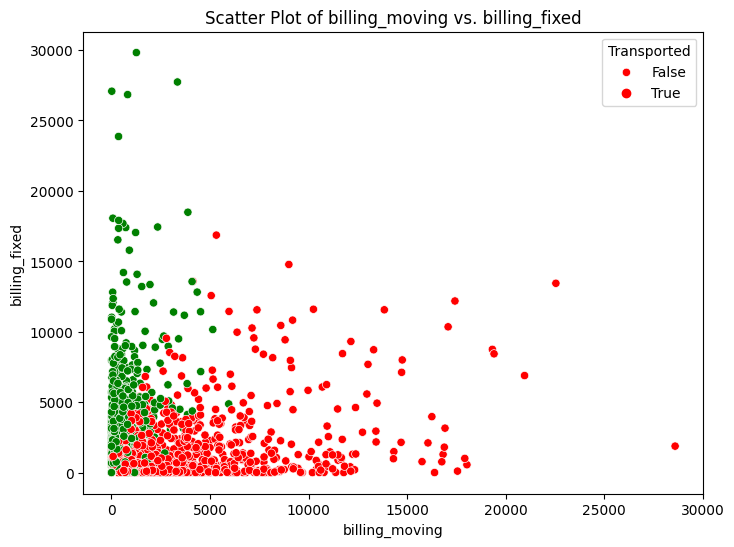

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your cryo_data DataFrame
cryo_data = train[train["CryoSleep"] == 0][["billing_moving", "billing_fixed", "Transported"]]

# Create a scatter plot with different colors for "Transported" (True/False)
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.scatterplot(data=cryo_data, x="billing_moving", y="billing_fixed", hue="Transported", palette={True: 'green', False: 'red'})

plt.title("Scatter Plot of billing_moving vs. billing_fixed")
plt.xlabel("billing_moving")
plt.ylabel("billing_fixed")

plt.legend(title="Transported", labels=["False", "True"])  # Custom legend labels

plt.show()

/tmp/ipykernel_20/3168538725.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryo_data["Transported_Indicator"] = cryo_data["Transported"].astype(int)
/tmp/ipykernel_20/3168538725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryo_data["All_Indicator"] =True


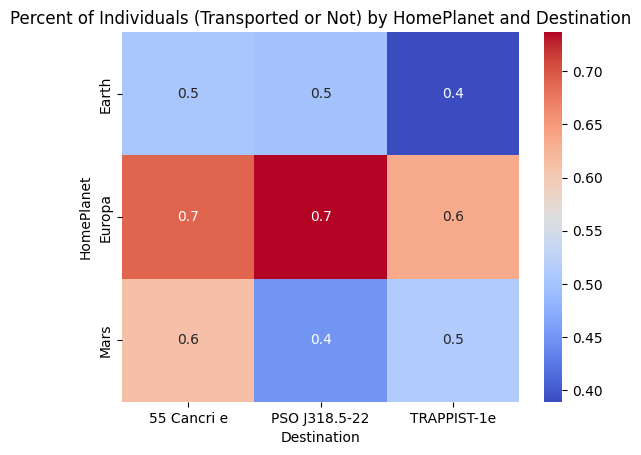

In [40]:
# indicate percentage import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cryo_data = train[["HomePlanet", "Destination", "Transported"]]

cryo_data["Transported_Indicator"] = cryo_data["Transported"].astype(int)
cryo_data["All_Indicator"] =True

heatmap_data_transported = cryo_data.pivot_table(index="HomePlanet", columns="Destination", values="Transported_Indicator", aggfunc="sum", fill_value=0)


heatmap_data_all = cryo_data.pivot_table(index="HomePlanet", columns="Destination", values="All_Indicator", aggfunc="sum", fill_value=0)

heatmap_data_percent = heatmap_data_transported /heatmap_data_all

sns.heatmap(heatmap_data_percent, cmap='coolwarm', cbar=True, annot=True, fmt=".1f")  # Remove annot=True and set fmt=""

plt.title("Percent of Individuals (Transported or Not) by HomePlanet and Destination")
plt.xlabel("Destination")
plt.ylabel("HomePlanet")
plt.show()


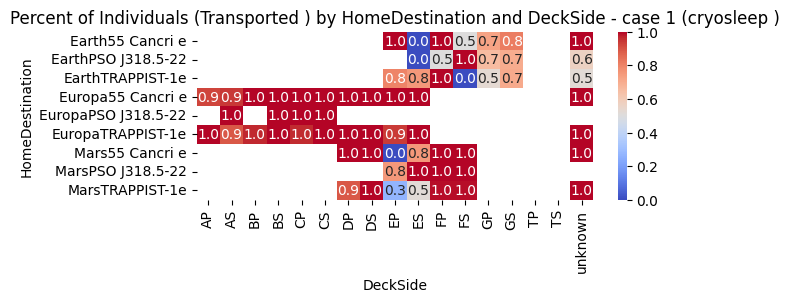

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cryo_data = train[train["CryoSleep"] == 1][["HomeDestination", "DeckSide", "Transported"]]
#cryo_data = train[["HomeDestination", "DeckSide", "Transported"]]

cryo_data["All_Indicator"] =True

heatmap_data_all = cryo_data.pivot_table(index="HomeDestination", columns="DeckSide", values="All_Indicator", aggfunc="sum", fill_value=0)

heatmap_data_transported = cryo_data.pivot_table(index="HomeDestination", columns="DeckSide", values="Transported", aggfunc="sum", fill_value=0)

heatmap_data_percent = heatmap_data_transported /heatmap_data_all
plt.subplot(2,1,2)
sns.heatmap(heatmap_data_percent, cmap='coolwarm', cbar=True, annot=True, fmt="0.01f")  # Remove annot=True and set fmt=""

plt.title("Percent of Individuals (Transported ) by HomeDestination and DeckSide - case 1 (cryosleep )")
plt.ylabel("HomeDestination")
plt.xlabel("DeckSide")

plt.show()
plt.show()

In [42]:
# cleaning data + one hot encoding 
# cleaning 
# check data 
print(train.columns)
# features
features = ["CryoSleep","HomePlanet","Destination","billing_moving","billing_fixed","CabinNum","Deck","Side", "Age"]
target = ["Transported"]
_id = ["PassengerId"]



Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'billing_moving', 'billing_fixed',
       'HomeDestination', 'Deck', 'Side', 'DeckSide', 'CabinNum'],
      dtype='object')


In [43]:
train[features].dtypes


CryoSleep           object
HomePlanet          object
Destination         object
billing_moving     float64
billing_fixed      float64
CabinNum             int64
Deck              category
Side              category
Age                float64
dtype: object

In [44]:
print(train[features].isna().sum(axis=0))
print(test[features].isna().sum(axis=0))
# billing moving , billing fixed fillna 0 
train.billing_moving = train.billing_moving.fillna(0)
test.billing_moving = test.billing_moving.fillna(0)

train.billing_fixed = train.billing_fixed.fillna(0)
test.billing_fixed = test.billing_fixed.fillna(0)
# categorical (object, category) fill with unknown (cryosleep also )
train_categorical= train.select_dtypes(include=['object']).columns
#train_categorical = train.dtypes[train.dtypes in ("object","category")].index

print(train_categorical)
print(train[train_categorical].describe())
train[train_categorical]= train[train_categorical].fillna('unknown')
# age mean 
test_categorical= test.select_dtypes(include=['object']).columns

#test_categorical = test.dtypes[train.dtypes in ("object","category")].index

print(test_categorical)
print(test[test_categorical].describe())
test[test_categorical]= test[test_categorical].fillna('unknown')

print(train[features].dtypes)
print(test[features].dtypes)

CryoSleep         217
HomePlanet        201
Destination       182
billing_moving    544
billing_fixed     389
CabinNum            0
Deck                0
Side                0
Age               179
dtype: int64
CryoSleep          93
HomePlanet         87
Destination        92
billing_moving    259
billing_fixed     202
CabinNum            0
Deck                0
Side                0
Age                91
dtype: int64
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'HomeDestination'],
      dtype='object')
       PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name   HomeDestination  
count             8493              8

In [45]:
train_mean_age = train.Age.mean()
train.Age = train.Age.fillna(train_mean_age)
test_mean_age = test.Age.mean()
test.Age = test.Age.fillna(test_mean_age)


In [46]:
train[features]

,CryoSleep,HomePlanet,Destination,billing_moving,billing_fixed,CabinNum,Deck,Side,Age
0,False,Europa,TRAPPIST-1e,0.0,0.0,0,B,P,39.0
1,False,Earth,TRAPPIST-1e,702.0,34.0,0,F,S,24.0
2,False,Europa,TRAPPIST-1e,6807.0,3576.0,0,A,S,58.0
3,False,Europa,TRAPPIST-1e,3522.0,1654.0,0,A,S,33.0
4,False,Earth,TRAPPIST-1e,870.0,221.0,1,F,S,16.0
...,...,...,...,...,...,...,...,...,...
8688,False,Europa,55 Cancri e,1717.0,6819.0,98,A,P,41.0
8689,True,Earth,PSO J318.5-22,0.0,0.0,1499,G,S,18.0
8690,False,Earth,TRAPPIST-1e,1.0,1872.0,1500,G,S,26.0
8691,False,Europa,55 Cancri e,3588.0,1049.0,608,E,S,32.0


In [47]:
import pandas as pd

# Assuming you have separate training and test DataFrames, train_df and test_df
combined_df = pd.concat([train[features + _id], test[features +_id]], axis=0)
categorical_cols = ['CryoSleep', 'HomePlanet', 'Destination', 'Deck', 'Side']# combined_df.select_dtypes(include=['object',"category"]).columns

combined_encoded = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)

train_encoded = combined_encoded.iloc[:len(train)]
test_encoded = combined_encoded.iloc[len(train):]


In [48]:
train_encoded.columns

Index(['billing_moving', 'billing_fixed', 'CabinNum', 'Age', 'PassengerId',
       'CryoSleep_True', 'CryoSleep_unknown', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'HomePlanet_unknown', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_unknown', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_unknown',
       'Side_S', 'Side_unknown'],
      dtype='object')

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = train_encoded
y= train[target]
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)

accuracy = accuracy_score(val_y, rf_val_predictions)

/tmp/ipykernel_20/349154431.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_X, train_y)


In [50]:
accuracy

0.8104875804967802

In [51]:
print(test)
print(test_encoded)

     PassengerId HomePlanet CryoSleep     Cabin    Destination        Age  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.000000   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.000000   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.000000   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.000000   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.000000   
...          ...        ...       ...       ...            ...        ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.000000   
4273     9269_01      Earth     False   unknown    TRAPPIST-1e  42.000000   
4274     9271_01       Mars      True   D/296/P    55 Cancri e  28.658146   
4275     9273_01     Europa     False   D/297/P        unknown  28.658146   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.000000   

        VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     

In [52]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X,y)

X_test = test_encoded
test_val_predictions = rf_model.predict(X_test)


/tmp/ipykernel_20/2505213815.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X,y)


In [53]:
test.shape

(4277, 18)

In [54]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId,
                       'Transported': test_val_predictions})
output.to_csv('submission.csv', index=False)

In [55]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [56]:
# Data in cryo only  
# Your cryo_data DataFrame
data = train[train["CryoSleep"] == 1]
x_data = data[[ "DeckSide", "HomeDestination"]]
y_data = data["Transported"]
# X1: DeckSide  Y : Transported 
values = np.array(train["DeckSide"].unique())
freq_table = pd.crosstab(index=data["Transported"], 
                            columns=data["DeckSide"],
                             margins=True)
freq_table.index= ["Transported","NoTransported","coltotal"]
# joint probability 
freq_table/freq_table.loc["coltotal","All"]
# likelihood table1 Prior probability  

# likelihood table2 Posterior probability

DeckSide,AP,AS,BP,BS,CP,CS,DP,DS,EP,ES,FP,FS,GP,GS,unknown,All
Transported,0.000329,0.000988,0.000988,0.000000,0.000659,0.000000,0.000329,0.000000,0.009549,0.009878,0.000988,0.001646,0.090550,0.060915,0.005598,0.182417
NoTransported,0.009220,0.011854,0.059598,0.077379,0.042147,0.054001,0.014817,0.019098,0.015147,0.020744,0.090879,0.087586,0.132367,0.160685,0.022061,0.817583
coltotal,0.009549,0.012842,0.060586,0.077379,0.042805,0.054001,0.015147,0.019098,0.024695,0.030622,0.091867,0.089233,0.222917,0.221600,0.027659,1.000000


reduce dimensions of categorical data 